<a href="https://colab.research.google.com/github/sogangori/choongang20/blob/master/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

convolution 컨볼루션 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [0]:
#tensorflow 이미지 format(m,h,w,c), 필터 format(h,w,c,m), 조건: c 가 같아야 한다
input = np.array([1,2,3,4,5,6]).reshape((1,2,3,1)).astype(np.float32)
filter = np.array([1,2,3,4]).reshape((2,2,1,1)).astype(np.float32)
out = tf.nn.conv2d(input, filter, padding='VALID')

In [0]:
sess = tf.Session()
sess.run(out)

array([[[[37.],
         [47.]]]], dtype=float32)

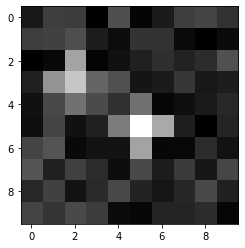

In [0]:
# 10 x 10 x 1(h,w,c) 흑백 이미지를 2장 만들어서 임의의 위치에 '+' 패턴을 그려서 필터로 찾아보자
y = np.array([[[3,3],[7,7]], [[2,3],[5,5]]]) 
x = np.zeros((2, 10, 10, 1)) # 2장의 흑백 이미지 MHWC-포맷 
x += np.random.rand(2, 10, 10, 1) # 노이즈
for i in range(len(y)):#2
  label = y[i]
  for j in range(len(label)):
    point = label[j]  
    px = point[0]
    py = point[1]
    x[i, py-1:py+2, px] += 1
    x[i, py, px-1:px+2] += 1  
plt.imshow(x[1,:,:,0], cmap='gray') #패턴 확인

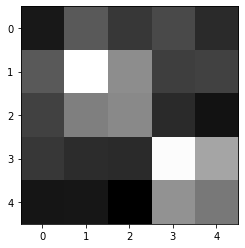

In [0]:
#convolution: 이동 불변성 shift invariant, 가중치 공유 weight sharing
filter = np.array([0,1,0,1,1,1,0,1,0], dtype=np.float32).reshape((3,3,1,1))#필터:hwcm포맷
out = tf.nn.conv2d(x, filter, padding='SAME') # SAME(90%) or VALID(상하좌우 값 1개씩 빠집니다) 
out = tf.nn.max_pool(out, ksize=2, strides=2, padding='SAME')
sess = tf.Session()
response = sess.run(out)
plt.imshow(response[0,:,:,0], cmap='gray')  # 패턴 위치에서 가장 큰 값이 나타납니다

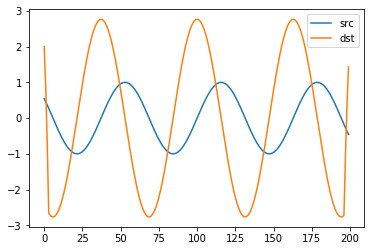

In [0]:
x = np.arange(-10, 10, 0.1)
src = np.sin(x)
#dst = np.convolve(src, [-1,0,1,2,1,0,-1], 'same') # 값이 올라갔다 내려오는 위치
dst = np.convolve(src, [3,2,1,0,-1,-2,-3], 'same') # 값이 떨어지는 위치
plt.plot(src, label='src')
plt.plot(dst, label='dst')
plt.legend()

In [0]:
# 미션, 값이 떨어지는 부분을 찾아라
# full : 기본, CNN 에서 사용하지 않음
# same : 필요하면 패딩을 사용해서 src, out 의 길이가 같게 만듭니다
# valid : 패딩 사용 안함
x = [1,2,3,4,5]
full = np.convolve(x, [1,2])
same = np.convolve(x, [1,2], 'same')
valid = np.convolve(x, [1,2], 'valid') #필터가 반전
#full, same, valid

(array([ 1,  4,  7, 10, 13, 10]),
 array([ 1,  4,  7, 10, 13]),
 array([ 4,  7, 10, 13]))

In [0]:
len(x), len(y)

(18, 21)

In [0]:
np.sum(np.array([0,1,2,3]) * np.array([0,1,0,-1]))

-2

In [0]:
np.sum(np.array([0,1,2]) * np.array([1,1,1]))

3

In [0]:
np.sum(np.array([1,2,3]) * np.array([1,1,1]))

6

In [0]:
np.sum(np.array([2,3,0]) * np.array([1,1,1]))

5

In [0]:
np.sum(np.array([3,0,0]) * np.array([1,1,1]))

3

In [0]:
from sklearn.datasets import load_digits
data = load_digits()
x = data.images
y = data.target
x.shape, y.shape

((1797, 8, 8), (1797,))

In [0]:
from tensorflow import keras

In [0]:
model = keras.Sequential()
model.add(keras.layers.Input((8,8,1)))
model.add(keras.layers.Conv2D(3, [3,3], padding='same'))#필터 갯수 32, 크기 [3,3]
model.add(keras.layers.MaxPool2D((2,2), padding='same'))
model.add(keras.layers.Conv2D(6, [3,3], padding='same'))
model.add(keras.layers.MaxPool2D((2,2), padding='same'))
model.add(keras.layers.Flatten())# 1D 로 모양 바꾸기
model.add(keras.layers.Dense(10, activation=keras.layers.Softmax())) # 클래스가 10개이므로 
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
#model.summary()

In [0]:
x_4d = np.expand_dims(x, -1)
model.fit(x_4d, y, epochs=2)
#model.predict(x_4d[:1])

Train on 1797 samples
Epoch 1/20
1797/1797 [==============================] - 0s 113us/sample - loss: 0.0665 - acc: 0.9827
Epoch 2/20
1797/1797 [==============================] - 0s 106us/sample - loss: 0.0663 - acc: 0.9811
Epoch 3/20
1797/1797 [==============================] - 0s 107us/sample - loss: 0.0630 - acc: 0.9844
Epoch 4/20
1797/1797 [==============================] - 0s 107us/sample - loss: 0.0638 - acc: 0.9839
Epoch 5/20
1797/1797 [==============================] - 0s 110us/sample - loss: 0.0590 - acc: 0.9844
Epoch 6/20
1797/1797 [==============================] - 0s 106us/sample - loss: 0.0594 - acc: 0.9822
Epoch 7/20
1797/1797 [==============================] - 0s 107us/sample - loss: 0.0560 - acc: 0.9861
Epoch 8/20
1797/1797 [==============================] - 0s 107us/sample - loss: 0.0561 - acc: 0.9844
Epoch 9/20
1797/1797 [==============================] - 0s 110us/sample - loss: 0.0537 - acc: 0.9850
Epoch 10/20
1797/1797 [==============================] - 0s 108us/sam